# Testing document for pyGSLModel

### Testing model download and pruning functions

Standard HUMAN-GEM model downlaod test

In [ ]:
# Downloading standard Human-GEM model
from pyGSLModel import download_model

model_1 = download_model()

print(f"Number of Reactions in model : {len(model_1.reactions)}")
print(f"Number of Metabolites in model : {len(model_1.metabolites)}")
print(f"Number of Genes in model : {len(model_1.genes)}")

Converting gene symbols, model pruning, and removing transport reactions test

In [ ]:
# Converting gene names, pruning the model and removing GSl transport reactions
from pyGSLModel import convert_genes, prune_model, remove_GSL_transport

model_2 = convert_genes(model_1)
model_2 = prune_model(model_2)
model_2 = remove_GSL_transport(model_2)

print(f"Number of Reactions in model : {len(model_1.reactions)}")
print(f"Number of Metabolites in model : {len(model_1.metabolites)}")
print(f"Number of Genes in model : {len(model_1.genes)}")

print(f"Checking gene symbol conversion :")
model_1.genes.get_by_id("B4GALNT1")

Testing download of pre-pruned model

In [2]:
# Testing pre-pruned model download
from pyGSLModel import download_GSL_model

model_3 = download_GSL_model()

print(f"Number of Reactions in model : {len(model_3.reactions)}")
print(f"Number of Metabolites in model : {len(model_3.metabolites)}")
print(f"Number of Genes in model : {len(model_3.genes)}")

print(f"Checking gene symbol conversion :")
model_3.genes.get_by_id("UGT8")

Model succesfully downloaded and read in.
Number of Reactions in model : 2307
Number of Metabolites in model : 2009
Number of Genes in model : 2887
Checking gene symbol conversion :


Gene identifier,UGT8
Name,G_UGT8
Memory address,0x23ae39faa90
Functional,True
In 1 reaction(s),MAR00919


In [22]:
metabolite_dict = {}
for rxn in model_3.reactions:
    if rxn.subsystem == "Blood group biosynthesis":
        for met in rxn.metabolites:
            if met.compartment == "g":
                metabolite_dict[met.id] = met.name

In [23]:
metabolite_dict

{'MAM01950g': 'GDP-L-fucose',
 'MAM02347g': 'lc4Cer',
 'MAM01948g': 'GDP',
 'MAM02039g': 'H+',
 'MAM03092g': 'type I H glycolipid',
 'MAM03110g': 'UDP-N-acetyl-D-galactosamine',
 'MAM03090g': 'type I A glycolipid',
 'MAM03106g': 'UDP',
 'MAM01850g': 'fucacgalfucgalacglcgalgluside heparan sulfate',
 'MAM03107g': 'UDP-galactose',
 'MAM03091g': 'type I B glycolipid',
 'MAM01859g': 'fucgalfucgalacglcgalgluside heparan sulfate',
 'MAM01999g': 'glycolipid',
 'MAM02328g': 'LacCer pool',
 'MAM03111g': 'UDP-N-acetylglucosamine',
 'MAM02346g': 'lc3Cer',
 'MAM02330g': 'lactoneotetraosylceramide',
 'MAM02593g': 'nLc5Cer',
 'MAM03095g': 'type II H glycolipid',
 'MAM01914g': 'galfuc12gal14acglcgalgluside heparan sulfate',
 'MAM01262g': 'acgalfuc12gal14acglcgalgluside heparan sulfate',
 'MAM01907g': 'galacgalfuc12gal14acglcgalgluside heparan sulfate',
 'MAM03097g': 'type III H glycolipid',
 'MAM03096g': 'type III A glycolipid',
 'MAM02594g': 'nLc6Cer',
 'MAM03137g': 'VI2Fuc-nLc6',
 'MAM01263g': 'acga

### Testing performing simulations and analysing results

Performing a generic FBA simulation

   Reaction ID  ... Relative GSL Flux (%)
0     MAR08147  ...             16.666667
14    MAR08184  ...             16.666667
21    MAR08191  ...             16.666667
19    MAR08189  ...             16.666667
10    MAR08179  ...             16.666667

[5 rows x 7 columns]


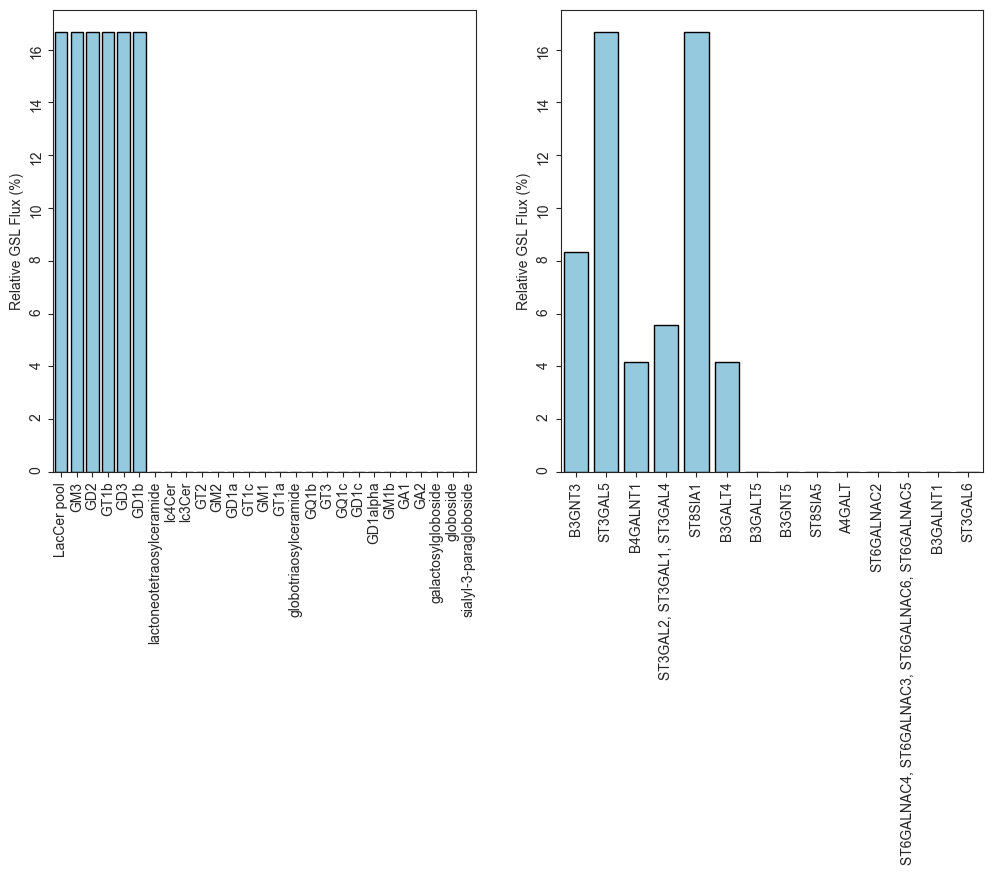

In [3]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_1 = run_metabolic_model(model_3, method="FBA",objective_choice="D14_Neuron")

# Preparing dataframe
results_1 = tabulate_model_results(model_3,sol_1)
print(results_1.head())

# Generating plot
fig_1 = plot_model_results(results_1)
fig_1

Performing a knockout simulation

   Reaction ID                                          Reactants  \
10    MAR08179  MAM01592g (CMP-N-acetylneuraminate), MAM02015g...   
0     MAR08147  MAM01972g (glucosylceramide pool), MAM03107g (...   
14    MAR08184  MAM01592g (CMP-N-acetylneuraminate), MAM02328g...   
25    MAR08277      MAM02346g (lc3Cer), MAM03107g (UDP-galactose)   
24    MAR08276      MAM02346g (lc3Cer), MAM03107g (UDP-galactose)   

                                             Products  \
10   MAM01590g (CMP), MAM01947g (GD3), MAM02039g (H+)   
0   MAM02039g (H+), MAM02328g (LacCer pool), MAM03...   
14   MAM01590g (CMP), MAM02015g (GM3), MAM02039g (H+)   
25  MAM02039g (H+), MAM02330g (lactoneotetraosylce...   
24  MAM02039g (H+), MAM02347g (lc4Cer), MAM03106g ...   

                  Key Product    Genes  Flux (mmol/gDW/hr)  \
10                        GD3  ST8SIA1               250.0   
0                 LacCer pool   B3GNT3               250.0   
14                        GM3  ST3GAL5               250

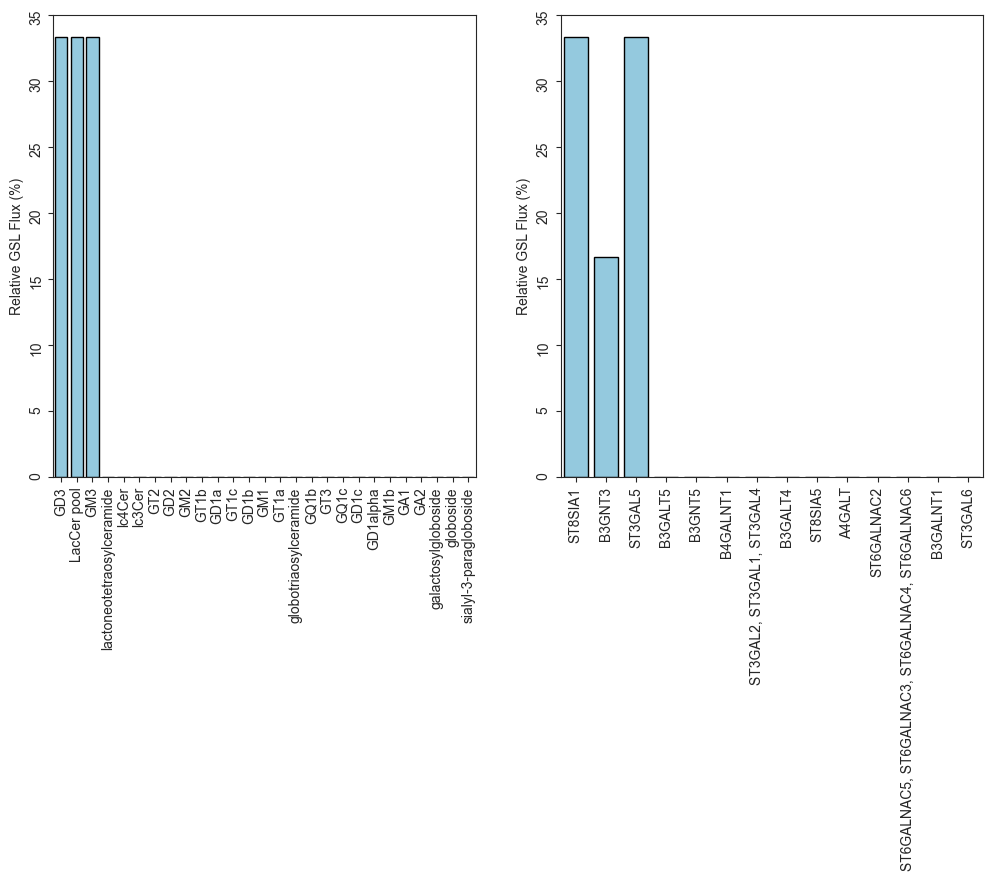

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_2 = run_metabolic_model(model_3, method="FBA",objective_choice="AC",knockout="B4GALNT1")

# Preparing dataframe
results_2 = tabulate_model_results(model_3,sol_2)
print(results_2.head())

# Generating plot
fig_2 = plot_model_results(results_2)
fig_2

Performing mFBA simulation

   Reaction ID                                          Reactants  \
0     MAR08147  MAM01972g (glucosylceramide pool), MAM03107g (...   
14    MAR08184  MAM01592g (CMP-N-acetylneuraminate), MAM02328g...   
10    MAR08179  MAM01592g (CMP-N-acetylneuraminate), MAM02015g...   
19    MAR08189  MAM01592g (CMP-N-acetylneuraminate), MAM01943g...   
21    MAR08191  MAM01947g (GD3), MAM03110g (UDP-N-acetyl-D-gal...   

                                             Products  Key Product  \
0   MAM02039g (H+), MAM02328g (LacCer pool), MAM03...  LacCer pool   
14   MAM01590g (CMP), MAM02015g (GM3), MAM02039g (H+)          GM3   
10   MAM01590g (CMP), MAM01947g (GD3), MAM02039g (H+)          GD3   
19  MAM01590g (CMP), MAM02030g (GT1b), MAM02039g (H+)         GT1b   
21   MAM01946g (GD2), MAM02039g (H+), MAM03106g (UDP)          GD2   

                        Genes  Flux (mmol/gDW/hr)  Relative GSL Flux (%)  
0                      B3GNT3          109.158416              18.155620  
14            

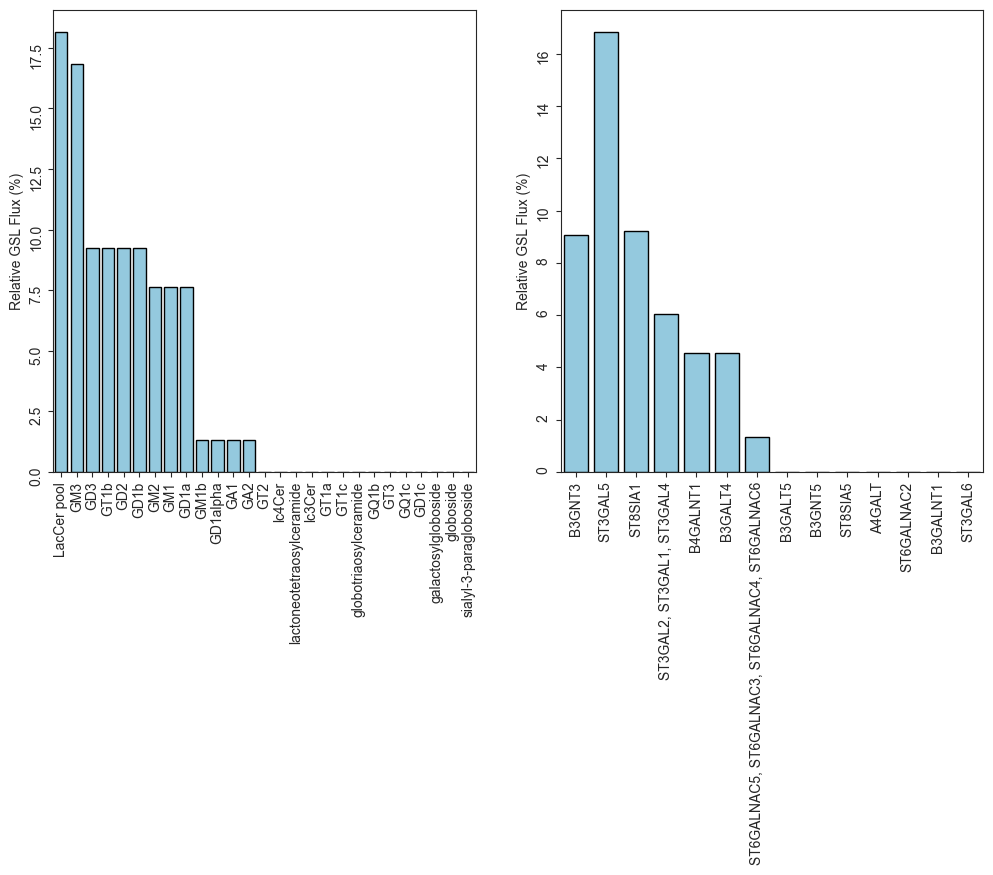

In [6]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_3 = run_metabolic_model(model_3, method="mFBA",objective_choice="D14_Neuron")

# Preparing dataframe
results_3 = tabulate_model_results(model_3,sol_3)
print(results_3.head())

# Generating plot
fig_3 = plot_model_results(results_3)
fig_3

### Transcriptomic integration testing

Testing standard iMat integration witha dummy dataframe

In [8]:
import pandas as pd
# Making a dummy dataframe
d = {
    "Gene" : ["B4GALNT1", "ST3GAL5", "ST8SIA1","A4GALT"],
    "Sample_1" : [8,6,4,2],
    "Sample_2" : [2,4,6,8],
    "Sample_3" : [6,2,8,4],
    "Sample_4" : [4,8,2,6]
}

# Converting the dictionary to a pandas dataframe and setting the index to Gene
iMAT_df_1 = pd.DataFrame(d)
iMAT_df_1 = iMAT_df_1.set_index("Gene").copy()

# Performing the iMAT integration for the custom data
from pyGSLModel import iMAT_integrate
iMAT_res_1 = iMAT_integrate(model_3, iMAT_df_1)

iMAT_res_1

Simulations Performed:1/4
Simulations Performed:2/4
Simulations Performed:3/4
Simulations Performed:4/4


Key Product,LacCer pool,GM3,GD3,GA2,GM1,GD1a,GM2,GD2,GT1c,GQ1c,...,GT1a,globotriaosylceramide,GQ1b,GD1c,GD1alpha,GM1b,GA1,galactosylgloboside,globoside,sialyl-3-paragloboside
Sample,,,,,,,,,,,,,,,,,,,,,
Sample_1,4.000000,3.000000,2.00,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample_2,1.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Sample_3,63.768555,62.768555,1.00,0.0,61.768555,61.768555,61.768555,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Sample_4,1.000000,1.000000,0.01,0.0,0.990000,0.990000,0.990000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Testing average TCGA integration with iMAT

In [9]:
from pyGSLModel import TCGA_iMAT_integrate

# Lets adjust upper and lower quantiles here to select the top and bottom 15% of genes instead. We're going to leave epsilon and threshold alone
iMAT_TCGA_1 = TCGA_iMAT_integrate(model_3, upper_quantile=0.15,lower_quantile=0.85)

iMAT_TCGA_1.head()

Simulations Performed:1/83
Simulations Performed:2/83
Simulations Performed:3/83
Simulations Performed:4/83
Simulations Performed:5/83
Simulations Performed:6/83
Simulations Performed:7/83
Simulations Performed:8/83
Simulations Performed:9/83
Simulations Performed:10/83
Simulations Performed:11/83
Simulations Performed:12/83
Simulations Performed:13/83
Simulations Performed:14/83
Simulations Performed:15/83
Simulations Performed:16/83
Simulations Performed:17/83
Simulations Performed:18/83
Simulations Performed:19/83
Simulations Performed:20/83
Simulations Performed:21/83
Simulations Performed:22/83
Simulations Performed:23/83
Simulations Performed:24/83
Simulations Performed:25/83
Simulations Performed:26/83
Simulations Performed:27/83
Simulations Performed:28/83
Simulations Performed:29/83
Simulations Performed:30/83
Simulations Performed:31/83
Simulations Performed:32/83
Simulations Performed:33/83
Simulations Performed:34/83
Simulations Performed:35/83
Simulations Performed:36/83
S

Key Product,LacCer pool,GM3,GM2,GD1a,GD2,GD1b,GM1,globotriaosylceramide,GD3,GD1alpha,...,lactoneotetraosylceramide,lc3Cer,GT2,GT1a,GT1c,GQ1b,GT3,GQ1c,GD1c,sialyl-3-paragloboside
Cancer,,,,,,,,,,,,,,,,,,,,,
Adipose - Subcutaneous,4.000000,2.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adipose - Visceral (Omentum),3.010000,2.0,1.0,1.0,1.0,1.0,1.0,0.010000,1.0,1.000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adrenal Gland,3.020000,2.0,1.0,1.0,1.0,1.0,1.0,0.010000,1.0,1.000,...,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adrenocortical Cancer,70.531818,2.0,1.0,1.0,1.0,1.0,1.0,50.638818,1.0,17.893,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Artery - Aorta,4.000000,2.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Testing sample wise iMAT integration of TCGA data

In [10]:
from pyGSLModel import TCGA_iMAT_sample_integrate

# Selecting Bile duct for tissue argument as this has fewer samples (Brain has something like 2000 so takes a while). Leaving other arguments as default
iMAT_TCGA_sample = TCGA_iMAT_sample_integrate(model_3, tissue="Bile duct")

iMAT_TCGA_sample.head()

Simulations Performed:1/45
Simulations Performed:2/45
Simulations Performed:3/45
Simulations Performed:4/45
Simulations Performed:5/45
Simulations Performed:6/45
Simulations Performed:7/45
Simulations Performed:8/45
Simulations Performed:9/45
Simulations Performed:10/45
Simulations Performed:11/45
Simulations Performed:12/45
Simulations Performed:13/45
Simulations Performed:14/45
Simulations Performed:15/45
Simulations Performed:16/45
Simulations Performed:17/45
Simulations Performed:18/45
Simulations Performed:19/45
Simulations Performed:20/45
Simulations Performed:21/45
Simulations Performed:22/45
Simulations Performed:23/45
Simulations Performed:24/45
Simulations Performed:25/45
Simulations Performed:26/45
Simulations Performed:27/45
Simulations Performed:28/45
Simulations Performed:29/45
Simulations Performed:30/45
Simulations Performed:31/45
Simulations Performed:32/45
Simulations Performed:33/45
Simulations Performed:34/45
Simulations Performed:35/45
Simulations Performed:36/45
S

,sample,_sample_type,primary disease or tissue,LacCer pool,globotriaosylceramide,globoside,galactosylgloboside,lactoneotetraosylceramide,lc3Cer,GA2,...,GT1b,GT2,lc4Cer,GT1a,GT1c,GQ1b,GT3,GQ1c,GD1c,sialyl-3-paragloboside
0,TCGA-W6-AA0S-01,Primary Tumor,Cholangiocarcinoma,58.008570,42.792856,41.792856,40.792856,12.205714,12.205714,2.000000,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCGA-W5-AA38-01,Primary Tumor,Cholangiocarcinoma,16.346667,4.000000,3.000000,2.000000,5.010000,6.010000,6.336667,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCGA-W5-AA2T-01,Primary Tumor,Cholangiocarcinoma,55.532501,4.000000,3.000000,2.000000,35.149376,35.149376,2.000000,...,13.383125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCGA-3X-AAVA-01,Primary Tumor,Cholangiocarcinoma,65.711070,35.587477,34.587477,1.000000,13.195826,13.195826,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCGA-3X-AAV9-01,Primary Tumor,Cholangiocarcinoma,17.666667,4.000000,3.000000,2.000000,6.000000,7.000000,2.000000,...,3.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
%pip install networkx
%pip install pyvis

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   --------------------------------------- 756.0/756.0 kB 15.9 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [jsonpickle]
   -------------------- ------------------- 1/2 [pyvis]
   -------------------- ------------------- 1/2 [pyvis]
   ---------------------------------------- 2/2 [pyvis]

Note: you may need to restart the kernel to use updated packages.
